# COVID-19 Tweet Sentiment Analysis vs COVID-19 Case Numbers

### To Get Full Project GoTo: https://github.com/ScottRWood/COVID-19-Sentiment-Analysis

## Accessing the COVID-19 Tweets by Language and Country

### Installs and Imports

In [1]:
from IPython.display import clear_output
!pip install twarc #Twarc
!pip install tweepy # Tweepy 3.8.0
!pip install argparse #Argparse 3.2
!pip install xtract #Xtract 0.1 a3
!pip install wget #Wget 3.2
clear_output()

In [2]:
import gzip
import shutil
import os
import wget
import csv
import linecache
from shutil import copyfile
import ipywidgets as widgets
import numpy as np
import pandas as pd
import json
import tweepy
from tweepy import OAuthHandler

### Download Data

In [51]:
dataset_URL = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-01-20/2021-01-20_clean-dataset.tsv.gz?raw=true"
wget.download(dataset_URL, out='clean-dataset.tsv.gz')

#Unzips the dataset and gets the TSV dataset
with gzip.open('clean-dataset.tsv.gz', 'rb') as f_in:
    with open('clean-dataset.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

#Deletes the compressed GZ file
os.unlink("clean-dataset.tsv.gz")

#Gets all possible languages from the dataset
df = pd.read_csv('clean-dataset.tsv',sep="\t")
lang_list = df.lang.unique()
country_list = df.country_code.unique()

lang_list= sorted(np.append(lang_list,'all'))
country_list= np.append(country_list,'all')

lang_picker = widgets.Dropdown(options=lang_list, value="all")
country_picker = widgets.Dropdown(options=country_list, value="all")


In [52]:
country_picker

Dropdown(index=145, options=(nan, 'MY', 'IN', 'MX', 'NL', 'CA', 'ID', 'BR', 'JP', 'GR', 'US', 'ZA', 'JM', 'DE'…

In [53]:
lang_picker

Dropdown(options=('all', 'am', 'ar', 'bg', 'bn', 'bo', 'ca', 'ckb', 'cs', 'cy', 'da', 'de', 'dv', 'el', 'en', …

In [24]:
#Creates a new clean dataset with the specified language and country (if specified)
filtered_language = lang_picker.value
filtered_country = country_picker.value

print(filtered_language)
print(filtered_country)

if filtered_language == "all" and filtered_country == "all":
    copyfile('clean-dataset.tsv', 'clean-dataset-filtered.tsv')
elif filtered_country == "all":
    filtered_tw = list()
    current_line = 1
    with open("clean-dataset.tsv") as tsvfile:
        tsvreader = csv.reader(tsvfile, delimiter="\t")

        if current_line == 1:
          filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))

          for line in tsvreader:
            if line[3] == filtered_language:
              filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))
            current_line += 1

    print('\033[1mShowing first 5 tweets from the filtered dataset\033[0m')
    print(filtered_tw[1:(6 if len(filtered_tw) > 6 else len(filtered_tw))])

    with open('clean-dataset-filtered.tsv', 'w') as f_output:
      for item in filtered_tw:
          f_output.write(item)
elif filtered_language == "all":
    filtered_tw = list()
    current_line = 1
    with open("clean-dataset.tsv") as tsvfile:
        tsvreader = csv.reader(tsvfile, delimiter="\t")

        if current_line == 1:
          filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))

          for line in tsvreader:
            if line[4] == filtered_country:
              filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))
            current_line += 1

    print('\033[1mShowing first 5 tweets from the filtered dataset\033[0m')
    print(filtered_tw[1:(6 if len(filtered_tw) > 6 else len(filtered_tw))])

    with open('clean-dataset-filtered.tsv', 'w') as f_output:
      for item in filtered_tw:
          f_output.write(item)
else:
    filtered_tw = list()
    current_line = 1
    with open("clean-dataset.tsv") as tsvfile:
        tsvreader = csv.reader(tsvfile, delimiter="\t")

        if current_line == 1:
          filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))

          for line in tsvreader:
            if line[4] == filtered_country and line[3] == filtered_language:
              filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))
            current_line += 1

    print('\033[1mShowing first 5 tweets from the filtered dataset\033[0m')
    print(filtered_tw[1:(6 if len(filtered_tw) > 6 else len(filtered_tw))])

    with open('clean-dataset-filtered.tsv', 'w') as f_output:
      for item in filtered_tw:
          f_output.write(item)

en
US
Showing first 5 tweets from the filtered dataset
['1351758157547249664\t2021-01-20\t05:07:13\ten\tUS\n', '1351758525475688448\t2021-01-20\t05:08:41\ten\tUS\n', '1351758616303263746\t2021-01-20\t05:09:03\ten\tUS\n', '1351758726995169281\t2021-01-20\t05:09:29\ten\tUS\n', '1351758761099194369\t2021-01-20\t05:09:37\ten\tUS\n']


### API Authentication

In [3]:
# Authenticate
CONSUMER_KEY = "0FBX64OjsGTGRnjiu5dSXVju1" #@param {type:"string"}
CONSUMER_SECRET_KEY = "ggEyzzn6cYQhqLkVHRiEoeaMYAZPijMVcUuE901OITq2AJP9OZ" #@param {type:"string"}
ACCESS_TOKEN_KEY = "1313477125350084608-JFxlfIqRCchUJ5NOabWcdRyNf4hz4s" #@param {type:"string"}
ACCESS_TOKEN_SECRET_KEY = "q6ivtuFHRmIXFERecMQlMgzjsfP9OJVTilZTfOpOPwN4l" #@param {type:"string"}

#Creates a JSON Files with the API credentials
with open('api_keys.json', 'w') as outfile:
    json.dump({
    "consumer_key":CONSUMER_KEY,
    "consumer_secret":CONSUMER_SECRET_KEY,
    "access_token":ACCESS_TOKEN_KEY,
    "access_token_secret": ACCESS_TOKEN_SECRET_KEY
     }, outfile)

In [5]:
from IPython.display import clear_output

!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_acquisition/get_metadata.py -O get_metadata.py

clear_output()

In [28]:
!python get_metadata.py -i clean-dataset-filtered.tsv -o hydrated_tweets -k api_keys.json

clear_output()

In [29]:
from IPython.display import clear_output

!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/parse_json_lite.py -O parse_json_lite.py
!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/fields.py -O fields.py

!pip install emot --upgrade
!pip install emoji --upgrade

clear_output()

In [30]:
import random 

no_samples = "1000" #@param {type:"string"}
list_tweets = None

with open("hydrated_tweets_short.json", "r") as myfile:
    list_tweets = list(myfile)

if int(no_samples) > len(list_tweets):
    no_samples = len(list_tweets)

sample = random.sample(list_tweets, int(no_samples))

file = open("sample_data.json", "w")
for i in sample:
  file.write(i)
file.close() #This close() is important

In [31]:
!python parse_json_lite.py sample_data.json p

clear_output()

### Frequency Analysis

Top 20 most unique words used from the dataset 

     Word  Frequency
      the        461
       to        358
       of        244
        a        222
      and        220
       in        192
 COVID-19        160
       is        153
        I        147
      for        144
 #COVID19        100
     that         96
       on         90
     this         88
      are         80
      you         78
     have         70
       be         61
     will         60
     with         60




<AxesSubplot:title={'center':'Top 20 most unique words used from the dataset'}, ylabel='Frequency'>

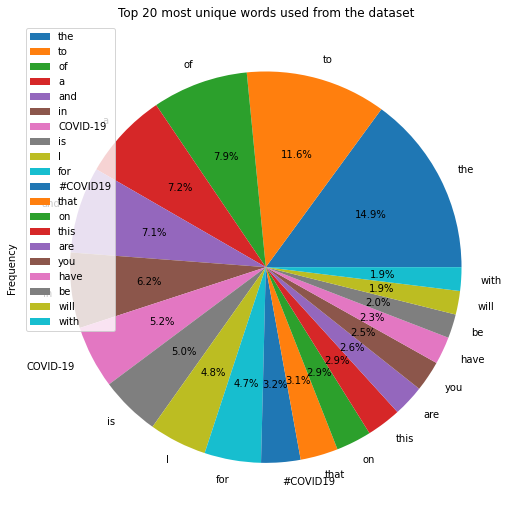

In [32]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

no_top_unique_words = "20" #@param {type:"string"}

df2 = pd.read_csv('sample_data.tsv',sep="\t")

result = Counter(" ".join(df['text'].values.tolist()).split(" ")).items()
df2 = pd.DataFrame(result)
df2.columns =['Word', 'Frequency']
df2 = df2[df2.Word != ""] #Deletes the empty spaces counted
df2 = df2.sort_values(['Frequency'], ascending=[False]) #Sort dataframe by frequency (Descending)

print('\033[1mTop '+no_top_unique_words+' most unique words used from the dataset\033[0m \n')
print(df2.head(int(no_top_unique_words)).to_string(index=False)) #Prints the top N unique words used
print("\n")
df3 = df2.head(int(no_top_unique_words))
df3.plot(y='Frequency', kind='pie', labels=df3['Word'], figsize=(9, 9), autopct='%1.1f%%', title='Top '+no_top_unique_words+' most unique words used from the dataset')

## Sentiment Analysis Model Builder

In [4]:
import nltk

nltk.download('twitter_samples')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

clear_output()

In [5]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [6]:
# Tokenization
pos_tokens = twitter_samples.tokenized('positive_tweets.json')
neg_tokens = twitter_samples.tokenized('negative_tweets.json')
txt_tokens = twitter_samples.tokenized('tweets.20150430-223406.json')

tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

In [7]:
from nltk.tag import pos_tag

print(pos_tag(tweet_tokens[0]))

[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]


### Sentence Lemmatization

In [8]:
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_sentence(tokens):
    '''
    Lemmatize a sentence that's a list of tokens
    '''
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

# Test lemmatize_sentence
print(lemmatize_sentence(tweet_tokens[0]))

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']


### Noise Removal

In [9]:
import re, string

def remove_noise(tweet_tokens, stop_words = ()):
    '''
    Remove noise from tweet tokens
    '''

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [10]:
from nltk.corpus import stopwords

# Test noise removal
stop_words = stopwords.words('english')

print(remove_noise(tweet_tokens[0], stop_words))

['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']


In [11]:
positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in pos_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in neg_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

In [12]:
def get_all_words(cleaned_tokens_list):
    '''
    Get all the tokens in the list
    '''
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

In [13]:
all_pos_words = get_all_words(positive_cleaned_tokens_list)
all_neg_words = get_all_words(negative_cleaned_tokens_list)

### Token Frequency

In [14]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
freq_dist_neg = FreqDist(all_neg_words)
print(freq_dist_pos.most_common(10))
print(freq_dist_neg.most_common(10))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]
[(':(', 4585), (':-(', 501), ("i'm", 343), ('...', 332), ('get', 325), ('miss', 291), ('go', 275), ('please', 275), ('want', 246), ('like', 218)]


### Train Naive Bayes Classifier

In [15]:
def get_tweets_for_model(cleaned_tokens_list):
    '''
    Get the tweets for building the datasets
    '''
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

In [16]:
import random

# Build datasets and randomise order
positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]

In [17]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.9926666666666667
Most Informative Features
                      :) = True           Positi : Negati =    991.4 : 1.0
                     sad = True           Negati : Positi =     34.0 : 1.0
                follower = True           Positi : Negati =     22.7 : 1.0
                     bam = True           Positi : Negati =     19.8 : 1.0
                    glad = True           Positi : Negati =     19.1 : 1.0
                     x15 = True           Negati : Positi =     16.2 : 1.0
                  arrive = True           Positi : Negati =     13.9 : 1.0
               goodnight = True           Positi : Negati =     13.7 : 1.0
                      aw = True           Negati : Positi =     13.6 : 1.0
                    sick = True           Negati : Positi =     13.3 : 1.0
None


## Analysis of COVID-19 Tweets Using the Model

In [22]:
tweets = []
for line in open('sample_data.json', 'r'):
    tweets.append(json.loads(line))

In [23]:
from nltk.tokenize import word_tokenize

pos_count = 0
neg_count = 0

# Count positive and negative instances in tweets
for tweet in tweets:
    custom_tweet = tweet['text']
    custom_tokens = remove_noise(word_tokenize(custom_tweet))
    if classifier.classify(dict([token, True] for token in custom_tokens)) == "Negative":
        neg_count += 1
    else:
        pos_count += 1

print([pos_count, neg_count])

[495, 505]


## COVID-19 API

In [17]:
!pip install COVID19Py
clear_output()

In [3]:
import COVID19Py
import requests
import json
from requests.adapters import HTTPAdapter

In [ ]:
# Grab latest COVID19 data (NOTE: this can often fail, hence why it's stored in a file)
covid19 = COVID19Py.COVID19("https://covid-tracker-us.herokuapp.com")
latest = covid19.getAll()

latest

In [20]:
df = pd.DataFrame(latest['locations'])
df

,id,country,country_code,country_population,province,last_updated,coordinates,latest
0,0,Afghanistan,AF,37172386.0,,2021-04-04T09:36:44.598402Z,"{'latitude': '33.93911', 'longitude': '67.7099...","{'confirmed': 56595, 'deaths': 2496, 'recovere..."
1,1,Albania,AL,2866376.0,,2021-04-04T09:36:44.651883Z,"{'latitude': '41.1533', 'longitude': '20.1683'}","{'confirmed': 126183, 'deaths': 2256, 'recover..."
2,2,Algeria,DZ,42228429.0,,2021-04-04T09:36:44.694214Z,"{'latitude': '28.0339', 'longitude': '1.6596'}","{'confirmed': 117524, 'deaths': 3102, 'recover..."
3,3,Andorra,AD,77006.0,,2021-04-04T09:36:44.744713Z,"{'latitude': '42.5063', 'longitude': '1.5218'}","{'confirmed': 12174, 'deaths': 117, 'recovered..."
4,4,Angola,AO,30809762.0,,2021-04-04T09:36:44.789116Z,"{'latitude': '-11.2027', 'longitude': '17.8739'}","{'confirmed': 22579, 'deaths': 540, 'recovered..."
...,...,...,...,...,...,...,...,...
269,269,Vietnam,VN,95540395.0,,2021-04-04T09:36:55.250650Z,"{'latitude': '14.058324', 'longitude': '108.27...","{'confirmed': 2626, 'deaths': 35, 'recovered': 0}"
270,270,West Bank and Gaza,PS,4569087.0,,2021-04-04T09:36:55.299359Z,"{'latitude': '31.9522', 'longitude': '35.2332'}","{'confirmed': 248482, 'deaths': 2681, 'recover..."
271,271,Yemen,YE,28498687.0,,2021-04-04T09:36:55.387480Z,"{'latitude': '15.552727', 'longitude': '48.516...","{'confirmed': 4697, 'deaths': 932, 'recovered'..."
272,272,Zambia,ZM,17351822.0,,2021-04-04T09:36:55.460569Z,"{'latitude': '-13.133897', 'longitude': '27.84...","{'confirmed': 88800, 'deaths': 1215, 'recovere..."


## Demonstration of Data on World Map

In [21]:
!pip install pycountry-convert
!pip install folium
clear_output()

In [22]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

def get_country_code_and_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [23]:
# Create a world map to show distributions of data
import folium
from folium.plugins import MarkerCluster

#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

#for each coordinate, create circlemarker of user percent
for i in range(len(df)):
    
    try:
        lat = float(df.iloc[i]['coordinates']['latitude'])
        long = float(df.iloc[i]['coordinates']['longitude'])
    except:
        continue
    radius = 5
    popup_text = """Country : {}<br>
                Confirmed : {}<br>
                Deaths    : {}<br>
                Recovered : {}<br>"""
    popup_text = popup_text.format(df.iloc[i]['country'], 
                                   df.iloc[i]['latest']['confirmed'],
                                  df.iloc[i]['latest']['deaths'],
                                  df.iloc[i]['latest']['recovered'])
    folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

In [24]:
world_map

In [25]:
df.to_json("latest_covid.json")

## Grabbing Tweets from All Countries from Dataset

In [64]:
def download_tweets(filtered_language, filtered_country, f_name):
    '''
    Download the required tweets, filtered by language or country if needed and save to file
    '''

    if filtered_language == "all" and filtered_country == "all":
        copyfile('clean-dataset.tsv', f_name)
    elif filtered_country == "all":
        filtered_tw = list()
        current_line = 1
        with open("clean-dataset.tsv") as tsvfile:
            tsvreader = csv.reader(tsvfile, delimiter="\t")

            if current_line == 1:
              filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))

              for line in tsvreader:
                if line[3] == filtered_language:
                  filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))
                current_line += 1

        with open(f_name, 'w+') as f_output:
          for item in filtered_tw:
              f_output.write(item)
    elif filtered_language == "all":
        filtered_tw = list()
        current_line = 1
        with open("clean-dataset.tsv") as tsvfile:
            tsvreader = csv.reader(tsvfile, delimiter="\t")

            if current_line == 1:
              filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))

              for line in tsvreader:
                if line[4] == filtered_country:
                  filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))
                current_line += 1

        with open(f_name, 'w+') as f_output:
          for item in filtered_tw:
              f_output.write(item)
    else:
        filtered_tw = list()
        current_line = 1
        with open("clean-dataset.tsv") as tsvfile:
            tsvreader = csv.reader(tsvfile, delimiter="\t")

            if current_line == 1:
              filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))

              for line in tsvreader:
                if line[4] == filtered_country and line[3] == filtered_language:
                  filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))
                current_line += 1

        with open(f_name, 'w+') as f_output:
          for item in filtered_tw:
              f_output.write(item)
    return f_name

In [65]:
# Download tweets
covid_tweets = {}
language = "all"

for i in range(len(df)):
    covid_tweets[df.iloc[i]['country_code']] = download_tweets(language, df.iloc[i]['country_code'], "./country_tweets/" + str(df.iloc[i]['country_code']) + "_" + language + ".tsv")

In [80]:
# Create tweet files for each country
for i in range(len(df)):
    f = open("./country_tweets/hydrated_tweets/" + str(df.iloc[i]['country_code']) + "_all","w+")
    f.close()

In [ ]:
# Download tweets
directory = './country_tweets'
for filename in os.listdir(directory):
    if filename.endswith(".tsv"):
        in_file = os.path.join(directory, filename)
        out_file = "./country_tweets/hydrated_tweets/" + os.path.splitext(filename)[0]
        !python get_metadata.py -i {in_file} -o {out_file} -k api_keys.json
    else:
        continue

In [18]:
from IPython.display import display

# Load tweets from files as dataframes
directory = './country_tweets/hydrated_tweets'
dfs = {}

for filename in os.listdir(directory):
    try:
        tests = []
        for line in open(os.path.join(directory, filename), 'r'):
            tests.append(json.loads(line))
            
        dfs[filename[:2]] = pd.DataFrame.from_records(tests)
    except:
        continue 

# Test load has worked
display(dfs['US'])

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status_id,quoted_status_id_str,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities
0,Wed Jan 20 05:25:24 +0000 2021,1351762730882002944,1351762730882002944,Wonder makes us. @UAZScience @uazresearch @uar...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,1.351756e+18,1351756094390079488,{'created_at': 'Wed Jan 20 04:59:01 +0000 2021...,0,5,False,False,False,en,NaN
1,Wed Jan 20 05:09:37 +0000 2021,1351758761099194369,1351758761099194369,So proud to see @MBSuperdome on here. \n🟨🟨🟨🟨🟨🟨...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,1.351753e+18,1351753307988123648,{'created_at': 'Wed Jan 20 04:47:57 +0000 2021...,0,0,False,False,False,en,NaN
2,Wed Jan 20 05:53:23 +0000 2021,1351769773013561351,1351769773013561351,More misery to come! https://t.co/5Kpktd5UY0,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,1.351769e+18,1351769349300891648,{'created_at': 'Wed Jan 20 05:51:42 +0000 2021...,0,0,False,False,False,en,NaN
3,Wed Jan 20 05:34:04 +0000 2021,1351764913191006208,1351764913191006208,"@auxwit To be fair, the coronavirus may be the...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.351764e+18,1351763722755137536,55897273.0,...,NaN,NaN,NaN,0,0,False,False,NaN,en,NaN
4,Wed Jan 20 05:45:15 +0000 2021,1351767727472594945,1351767727472594945,@TelenoticiasPR Es de esperarse que suceda tra...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.351424e+18,1351424181188120582,39774571.0,...,NaN,NaN,NaN,0,0,False,False,NaN,es,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,Thu Jan 21 04:54:39 +0000 2021,1352117383092203526,1352117383092203526,@Goldenlife2020 @ReignOfApril Oh got it! I tho...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.352114e+18,1352113702430978054,157176977.0,...,NaN,NaN,NaN,0,0,False,False,NaN,en,NaN
2031,Thu Jan 21 04:13:19 +0000 2021,1352106980421361665,1352106980421361665,&lt;&lt; BREAKING &gt;&gt;\n\nIt appears @inst...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,2,6,False,False,False,en,NaN
2032,Thu Jan 21 04:14:05 +0000 2021,1352107170586718209,1352107170586718209,"Smoot ignorance , President Biden open our boa...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,...,NaN,NaN,NaN,0,1,False,False,NaN,en,NaN
2033,Thu Jan 21 04:16:45 +0000 2021,1352107845601402882,1352107845601402882,This is a friendly reminder that free COVID-19...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,...,NaN,NaN,NaN,6,4,False,False,False,en,NaN


## Run Model on Tweets From Each Country

In [24]:
pos_neg_dict = {}

for d in dfs:
    pos_count = 0
    neg_count = 0
    
    # Count positive and negative instances for this country
    for i in range(len(dfs[d])):
        custom_tweet = dfs[d].iloc[i]['text']
        custom_tokens = remove_noise(word_tokenize(custom_tweet))
        if classifier.classify(dict([token, True] for token in custom_tokens)) == "Negative":
            neg_count += 1
        else:
            pos_count += 1

    pos_neg_dict[d] = (pos_count, neg_count)

In [25]:
pd.DataFrame.from_records(pos_neg_dict, index=['Positive', 'Negative'])

,AD,AE,AF,AG,AL,AM,AO,AR,AT,AU,...,VU,WS,XK,XX,YE,YT,ZA,ZM,ZW,na
Positive,1,12,0,0,0,0,0,79,23,39,...,0,0,0,0,0,0,67,5,12,0
Negative,0,9,1,0,1,4,0,169,44,44,...,0,0,0,0,0,1,103,0,13,0


In [26]:
# Calculate Negative : Positive for each country

neg_pos_ratios = {}
for k in pos_neg_dict:
    if pos_neg_dict[k][0] != 0:
        neg_pos_ratios[k] = pos_neg_dict[k][1] / pos_neg_dict[k][0]
    else:
        if pos_neg_dict[k][1] == 0:
            neg_pos_ratios[k] = 1
        else:
            continue

neg_pos_ratios

{'DZ': 0.0,
 'AD': 0.0,
 'AO': 1,
 'AG': 1,
 'AR': 2.1392405063291138,
 'AU': 1.1282051282051282,
 'AT': 1.9130434782608696,
 'AZ': 1,
 'BS': 1,
 'BH': 1,
 'BD': 2.3333333333333335,
 'BB': 0.5,
 'BY': 1,
 'BE': 1.6470588235294117,
 'BZ': 0.0,
 'BT': 0.0,
 'BO': 9.0,
 'BA': 1,
 'BW': 1.2,
 'BR': 2.409090909090909,
 'BN': 1,
 'BF': 0.0,
 'BI': 0.0,
 'CV': 1,
 'KH': 1,
 'CM': 0.0,
 'CA': 1.2733333333333334,
 'CF': 1,
 'TD': 1,
 'CL': 1.7222222222222223,
 'CN': 1.1428571428571428,
 'CO': 2.097560975609756,
 'KM': 1,
 'CG': 5.0,
 'CD': 4.0,
 'CR': 1.5,
 'HR': 1,
 'CU': 3.0,
 'CY': 2.5,
 'CZ': 7.0,
 'DK': 1.0,
 'XX': 1,
 'DM': 1,
 'DO': 1.0,
 'EC': 2.8518518518518516,
 'SV': 3.0,
 'GQ': 1,
 'ER': 1,
 'EE': 1,
 'SZ': 1.0,
 'ET': 0.0,
 'FJ': 0.0,
 'FI': 3.6666666666666665,
 'FR': 1.8571428571428572,
 'GM': 0.0,
 'GE': 1,
 'DE': 1.4528301886792452,
 'GH': 1.0,
 'GR': 8.0,
 'GD': 1,
 'GT': 1.25,
 'GN': 1,
 'GW': 1,
 'GY': 1,
 'HT': 1,
 'VA': 1,
 'HN': 2.0,
 'IS': 1,
 'IN': 1.1313868613138687,
 '

In [27]:
# Regrab Latest COVID Stats from saved file

covid_df = pd.read_json("latest_covid.json")
covid_df

,id,country,country_code,country_population,province,last_updated,coordinates,latest
0,0,Afghanistan,AF,37172386.0,,2021-04-04T09:36:44.598402Z,"{'latitude': '33.93911', 'longitude': '67.7099...","{'confirmed': 56595, 'deaths': 2496, 'recovere..."
1,1,Albania,AL,2866376.0,,2021-04-04T09:36:44.651883Z,"{'latitude': '41.1533', 'longitude': '20.1683'}","{'confirmed': 126183, 'deaths': 2256, 'recover..."
2,2,Algeria,DZ,42228429.0,,2021-04-04T09:36:44.694214Z,"{'latitude': '28.0339', 'longitude': '1.6596'}","{'confirmed': 117524, 'deaths': 3102, 'recover..."
3,3,Andorra,AD,77006.0,,2021-04-04T09:36:44.744713Z,"{'latitude': '42.5063', 'longitude': '1.5218'}","{'confirmed': 12174, 'deaths': 117, 'recovered..."
4,4,Angola,AO,30809762.0,,2021-04-04T09:36:44.789116Z,"{'latitude': '-11.2027', 'longitude': '17.8739'}","{'confirmed': 22579, 'deaths': 540, 'recovered..."
...,...,...,...,...,...,...,...,...
269,269,Vietnam,VN,95540395.0,,2021-04-04T09:36:55.250650Z,"{'latitude': '14.058324', 'longitude': '108.27...","{'confirmed': 2626, 'deaths': 35, 'recovered': 0}"
270,270,West Bank and Gaza,PS,4569087.0,,2021-04-04T09:36:55.299359Z,"{'latitude': '31.9522', 'longitude': '35.2332'}","{'confirmed': 248482, 'deaths': 2681, 'recover..."
271,271,Yemen,YE,28498687.0,,2021-04-04T09:36:55.387480Z,"{'latitude': '15.552727', 'longitude': '48.516...","{'confirmed': 4697, 'deaths': 932, 'recovered'..."
272,272,Zambia,ZM,17351822.0,,2021-04-04T09:36:55.460569Z,"{'latitude': '-13.133897', 'longitude': '27.84...","{'confirmed': 88800, 'deaths': 1215, 'recovere..."


## Graphical Analysis

In [136]:
!pip install pypopulation

In [28]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import pypopulation
plt.style.use('seaborn-whitegrid')

In [29]:
def statistical_analysis(x, y):
    '''
    Calculate statistics about x and y
    '''
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    x_std = np.std(x)
    y_std = np.std(y)
    covariance = np.cov(x, y)

    pearson_correlation, _ = pearsonr(x, y)
    spearman_correlation, _ = spearmanr(x, y)

    print("X Mean: %.3f  Std: %.3f" % (x_mean, x_std))
    print("Y Mean: %.3f  Std: %.3f" % (y_mean, y_std))
    print("Pearsons correlation: %.3f" % pearson_correlation)
    print("Spearmans correlation: %.3f" % spearman_correlation)
    print("Covariance Matrix: ")
    print(covariance)

def draw_graph(x, y, x_label, y_label):
    '''
    Draw graph using x and y
    '''
    plt.plot(x, y, 'o', color='blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    z1 = np.polyfit(x, y, 1)
    p = np.poly1d(z1)
    plt.plot(x,p(x),"r--")

### Comparison Of Ratio to Confirmed Cases and Death Counts

X Mean: 1.099  Std: 1.128
Y Mean: 676841.884  Std: 2750214.794
Pearsons correlation: -0.006
Spearmans correlation: 0.062
Covariance Matrix: 
[[ 1.28053442e+00 -1.92755120e+04]
 [-1.92755120e+04  7.60791347e+12]]


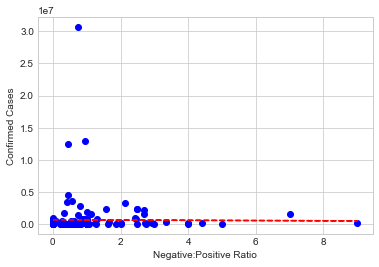

In [165]:
x = []
y = []

for k in neg_pos_ratios:
    try:
        y.append(covid_df.loc[covid_df['country_code'] == k]['latest'].values[0]['confirmed'])
        x.append(neg_pos_ratios[k])
    except:
        continue

draw_graph(x, y, 'Negative:Positive Ratio', 'Confirmed Cases')
statistical_analysis(x, y)

X Mean: 1.099  Std: 1.128
Y Mean: 14656.308  Std: 54527.729
Pearsons correlation: 0.032
Spearmans correlation: 0.092
Covariance Matrix: 
[[1.28053442e+00 1.98467592e+03]
 [1.98467592e+03 2.99066081e+09]]


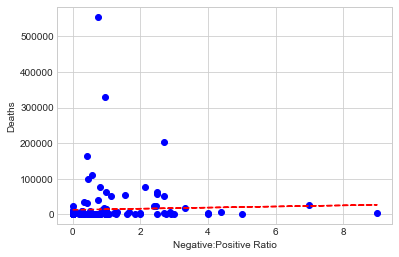

In [166]:
x = []
y = []

for k in neg_pos_ratios:
    try:
        y.append(covid_df.loc[covid_df['country_code'] == k]['latest'].values[0]['deaths'])
        x.append(neg_pos_ratios[k])
    except:
        continue
    
draw_graph(x, y, 'Negative:Positive Ratio', 'Deaths')
statistical_analysis(x, y)

### Comparison of Number of Negative Tweets to Confirmed Cases and Death Counts

X Mean: 30.209  Std: 109.376
Y Mean: 623496.801  Std: 2615499.696
Pearsons correlation: 0.814
Spearmans correlation: 0.531
Covariance Matrix: 
[[1.20261243e+04 2.33957585e+08]
 [2.33957585e+08 6.87684307e+12]]


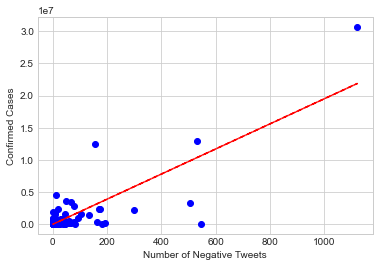

In [36]:
x = []
y = []
normalised_x = []

for k in pos_neg_dict:
    try:
        y.append(covid_df.loc[covid_df['country_code'] == k]['latest'].values[0]['confirmed'])
        x.append(pos_neg_dict[k][1])
    except:
        continue
    
draw_graph(x, y, 'Number of Negative Tweets', 'Confirmed Cases')
statistical_analysis(x, y)

X Mean: 0.000  Std: 0.000
Y Mean: 633436.729  Std: 2635092.137
Pearsons correlation: 0.081
Spearmans correlation: 0.379
Covariance Matrix: 
[[5.05317228e-12 4.80817338e-01]
 [4.80817338e-01 6.98084271e+12]]


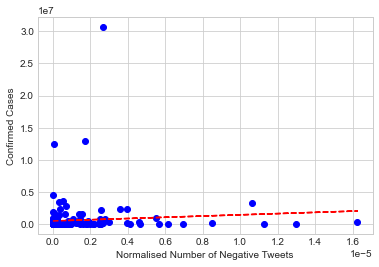

In [168]:
y = []
normalised_x = []

for k in pos_neg_dict:
    try:
        population = pypopulation.get_population(k)
        if population:
            y.append(covid_df.loc[covid_df['country_code'] == k]['latest'].values[0]['confirmed'])
            normalised_x.append(pos_neg_dict[k][1] / population)
    except:
        continue

draw_graph(normalised_x, y, 'Normalised Number of Negative Tweets', 'Confirmed Cases')
statistical_analysis(normalised_x, y)

X Mean: 24.916  Std: 88.791
Y Mean: 13491.220  Std: 51887.269
Pearsons correlation: 0.808
Spearmans correlation: 0.482
Covariance Matrix: 
[[7.92530874e+03 3.74397188e+06]
 [3.74397188e+06 2.70645865e+09]]


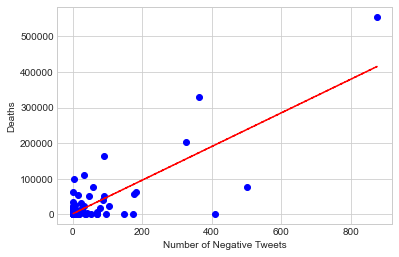

In [169]:
x = []
y = []

for k in pos_neg_dict:
    try:
        y.append(covid_df.loc[covid_df['country_code'] == k]['latest'].values[0]['deaths'])
        x.append(pos_neg_dict[k][1])
    except:
        continue
    
draw_graph(x, y, 'Number of Negative Tweets', 'Deaths')
statistical_analysis(x, y)

X Mean: 0.000  Std: 0.000
Y Mean: 13706.383  Std: 52271.439
Pearsons correlation: 0.101
Spearmans correlation: 0.331
Covariance Matrix: 
[[5.05317228e-12 1.19273007e-02]
 [1.19273007e-02 2.74691455e+09]]


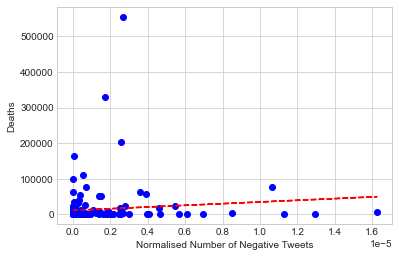

In [170]:
y = []
normalised_x = []

for k in pos_neg_dict:
    try:
        population = pypopulation.get_population(k)
        if population:
            y.append(covid_df.loc[covid_df['country_code'] == k]['latest'].values[0]['deaths'])
            normalised_x.append(pos_neg_dict[k][1] / population)
    except:
        continue

draw_graph(normalised_x, y, 'Normalised Number of Negative Tweets', 'Deaths')
statistical_analysis(normalised_x, y)

### Comparison of Number of Positive Tweets to Confirmed Cases and Death Count

X Mean: 24.058  Std: 100.180
Y Mean: 623496.801  Std: 2615499.696
Pearsons correlation: 0.860
Spearmans correlation: 0.504
Covariance Matrix: 
[[1.00889072e+04 2.26542747e+08]
 [2.26542747e+08 6.87684307e+12]]


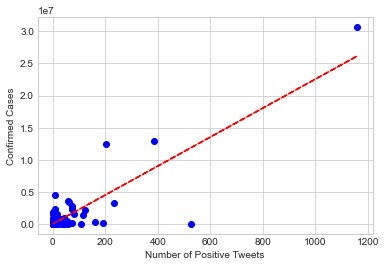

In [171]:
x = []
y = []

for k in pos_neg_dict:
    try:
        y.append(covid_df.loc[covid_df['country_code'] == k]['latest'].values[0]['confirmed'])
        x.append(pos_neg_dict[k][0])
    except:
        continue
    
draw_graph(x, y, 'Number of Positive Tweets', 'Confirmed Cases')
statistical_analysis(x, y)

X Mean: 0.000  Std: 0.000
Y Mean: 633436.729  Std: 2635092.137
Pearsons correlation: 0.052
Spearmans correlation: 0.326
Covariance Matrix: 
[[7.87628557e-12 3.88824124e-01]
 [3.88824124e-01 6.98084271e+12]]


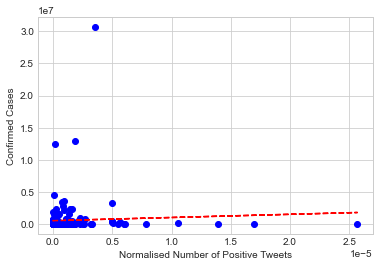

In [172]:
y = []
normalised_x = []

for k in pos_neg_dict:
    try:
        population = pypopulation.get_population(k)
        if population:
            y.append(covid_df.loc[covid_df['country_code'] == k]['latest'].values[0]['confirmed'])
            normalised_x.append(pos_neg_dict[k][0] / population)
    except:
        continue

draw_graph(normalised_x, y, 'Normalised Number of Positive Tweets', 'Confirmed Cases')
statistical_analysis(normalised_x, y)

X Mean: 24.058  Std: 100.180
Y Mean: 13491.220  Std: 51887.269
Pearsons correlation: 0.831
Spearmans correlation: 0.451
Covariance Matrix: 
[[1.00889072e+04 4.34174720e+06]
 [4.34174720e+06 2.70645865e+09]]


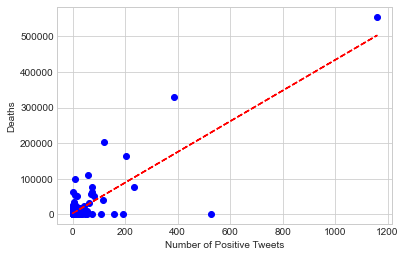

In [173]:
x = []
y = []

for k in pos_neg_dict:
    try:
        y.append(covid_df.loc[covid_df['country_code'] == k]['latest'].values[0]['deaths'])
        x.append(pos_neg_dict[k][0])
    except:
        continue
    
draw_graph(x, y, 'Number of Positive Tweets', 'Deaths')
statistical_analysis(x, y)

X Mean: 0.000  Std: 0.000
Y Mean: 13706.383  Std: 52271.439
Pearsons correlation: 0.050
Spearmans correlation: 0.271
Covariance Matrix: 
[[7.87628557e-12 7.37965072e-03]
 [7.37965072e-03 2.74691455e+09]]


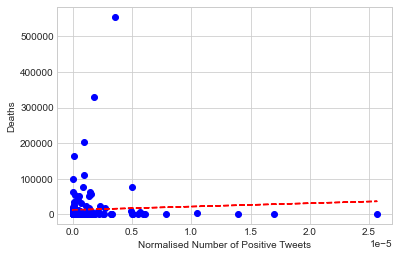

In [174]:
y = []
normalised_x = []

for k in pos_neg_dict:
    try:
        population = pypopulation.get_population(k)
        if population:
            y.append(covid_df.loc[covid_df['country_code'] == k]['latest'].values[0]['deaths'])
            normalised_x.append(pos_neg_dict[k][0] / population)
    except:
        continue

draw_graph(normalised_x, y, 'Normalised Number of Positive Tweets', 'Deaths')
statistical_analysis(normalised_x, y)

### Comparison of Population to Confirmed Cases and Death Count

X Mean: 40451277.426  Std: 146847283.432
Y Mean: 633436.729  Std: 2635092.137
Pearsons correlation: 0.396
Spearmans correlation: 0.524
Covariance Matrix: 
[[2.16794408e+16 1.54086919e+14]
 [1.54086919e+14 6.98084271e+12]]


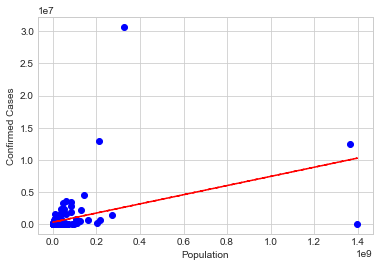

In [30]:
y = []
x = []

for k in pos_neg_dict:
    try:
        population = pypopulation.get_population(k)
        if population:
            y.append(covid_df.loc[covid_df['country_code'] == k]['latest'].values[0]['confirmed'])
            x.append(population)
    except:
        continue

draw_graph(x, y, 'Population', 'Confirmed Cases')
statistical_analysis(x, y)

X Mean: 40451277.426  Std: 146847283.432
Y Mean: 13706.383  Std: 52271.439
Pearsons correlation: 0.331
Spearmans correlation: 0.541
Covariance Matrix: 
[[2.16794408e+16 2.55718109e+12]
 [2.55718109e+12 2.74691455e+09]]


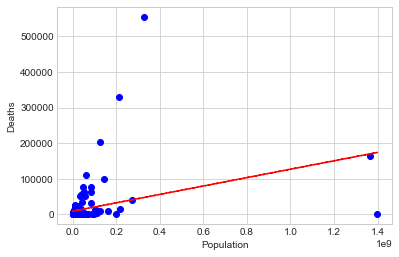

In [31]:
y = []
x = []

for k in pos_neg_dict:
    try:
        population = pypopulation.get_population(k)
        if population:
            y.append(covid_df.loc[covid_df['country_code'] == k]['latest'].values[0]['deaths'])
            x.append(population)
    except:
        continue

draw_graph(x, y, 'Population', 'Deaths')
statistical_analysis(x, y)

### Comparison of Population to Number of Positive and Negative Tweets

X Mean: 39253377.052  Std: 144714845.575
Y Mean: 18.479  Std: 76.935
Pearsons correlation: 0.252
Spearmans correlation: 0.494
Covariance Matrix: 
[[2.10508963e+16 2.81824380e+09]
 [2.81824380e+09 5.94963947e+03]]


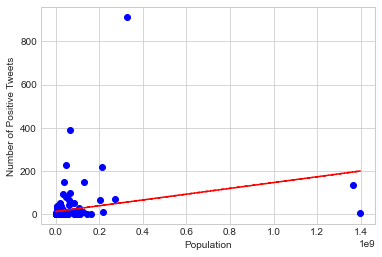

In [34]:
y = []
x = []

for k in pos_neg_dict:
    try:
        population = pypopulation.get_population(k)
        if population:
            y.append(pos_neg_dict[k][0])
            x.append(population)
    except:
        continue

draw_graph(x, y, 'Population', 'Number of Positive Tweets')
statistical_analysis(x, y)

X Mean: 39253377.052  Std: 144714845.575
Y Mean: 29.758  Std: 108.587
Pearsons correlation: 0.236
Spearmans correlation: 0.524
Covariance Matrix: 
[[2.10508963e+16 3.72988485e+09]
 [3.72988485e+09 1.18522467e+04]]


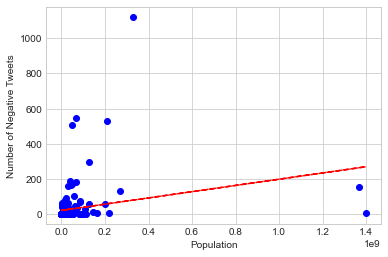

In [35]:
y = []
x = []

for k in pos_neg_dict:
    try:
        population = pypopulation.get_population(k)
        if population:
            y.append(pos_neg_dict[k][1])
            x.append(population)
    except:
        continue

draw_graph(x, y, 'Population', 'Number of Negative Tweets')
statistical_analysis(x, y)

### General Stats

In [135]:
max_positive_tweets = ([], 0)
min_positive_tweets = ([], float('inf'))
max_negative_tweets = ([], 0)
min_negative_tweets = ([], float('inf'))
max_ratio = ([], 0)
min_ratio = ([], float('inf'))

for k in pos_neg_dict:
    if pos_neg_dict[k][0] > max_positive_tweets[1]:
        max_positive_tweets = ([k], pos_neg_dict[k][0])
    elif pos_neg_dict[k][0] == max_positive_tweets[1]:
        max_positive_tweets[0].append(k)
        
    if pos_neg_dict[k][0] < min_positive_tweets[1]:
        min_positive_tweets = ([k], pos_neg_dict[k][0])
    elif pos_neg_dict[k][0] == min_positive_tweets[1]:
        min_positive_tweets[0].append(k)
    
    if pos_neg_dict[k][1] > max_negative_tweets[1]:
        max_negative_tweets = ([k], pos_neg_dict[k][1])
    elif pos_neg_dict[k][1] == max_negative_tweets[1]:
        max_negative_tweets[0].append(k)
        
    if pos_neg_dict[k][1] < min_negative_tweets[1]:
        min_negative_tweets = ([k], pos_neg_dict[k][1])
    elif pos_neg_dict[k][1] == min_negative_tweets[1]:
        min_negative_tweets[0].append(k)

for k in neg_pos_ratios:
    
    if neg_pos_ratios[k] > max_ratio[1]:
        max_ratio = ([k], neg_pos_ratios[k])
    elif neg_pos_ratios[k] == max_ratio[1]:
        max_ratio[0].append(k)
    
    if neg_pos_ratios[k] < min_ratio[1]:
        min_ratio = ([k], neg_pos_ratios[k])
    elif neg_pos_ratios[k] == min_ratio[1]:
        min_ratio[0].append(k)

print("================================")
print("     RATIOS")
print("================================")
print("Max Value: " + str(max_ratio[1]))
print("Max Keys: " + ','.join(max_ratio[0]))
print("Min Value: " + str(min_ratio[1]))
print("Min Keys: " + ','.join(min_ratio[0]))
print("================================")
print("     POSITIVE TWEETS")
print("================================")
print("Max Value: " + str(max_positive_tweets[1]))
print("Max Keys: " + ','.join(max_positive_tweets[0]))
print("Min Value: " + str(min_positive_tweets[1]))
print("Min Keys: " + ','.join(min_positive_tweets[0]))
print("================================")
print("     NEGATIVE TWEETS")
print("================================")
print("Max Value: " + str(max_negative_tweets[1]))
print("Max Keys: " + ','.join(max_negative_tweets[0]))
print("Min Value: " + str(min_negative_tweets[1]))
print("Min Keys: " + ','.join(min_negative_tweets[0]))

     RATIOS
Max Value: 9.0
Max Keys: CR
Min Value: 0.0
Min Keys: AF,DZ,BZ,BJ,BT,BG,BI,CM,DJ,FJ,GM,JO,MD,MC,ME,MA,RO,LC,TW,ZM,MP,KY
     POSITIVE TWEETS
Max Value: 1160
Max Keys: US
Min Value: 0
Min Keys: AL,AD,AO,AG,AZ,BS,BH,BY,BA,BN,MM,CV,KH,CF,TD,KM,HR,XX,DM,GQ,ER,EE,GA,GE,GD,GN,GW,GY,HT,VA,HU,IS,IR,XK,KG,LA,LV,LR,LY,LI,LT,LU,MG,ML,MH,MR,FM,MZ,NA,NI,NE,MK,OM,PG,KN,VC,WS,SM,ST,RS,SC,SL,SK,SB,SO,SS,SD,SR,SY,TJ,TL,TG,UZ,VU,PS,YE,na,AW,IM,YT,GF
     NEGATIVE TWEETS
Max Value: 875
Max Keys: US
Min Value: 0
Min Keys: AF,DZ,AO,AG,AZ,BS,BH,BY,BZ,BJ,BT,BA,BN,BG,BI,CV,KH,CM,CF,TD,KM,HR,XX,DJ,DM,GQ,ER,EE,FJ,GM,GE,GD,GN,GW,GY,HT,VA,IS,IR,JO,XK,LA,LR,LY,LI,MG,MH,MR,FM,MD,MC,ME,MA,NA,OM,PG,RO,KN,LC,VC,WS,SM,SC,SL,SB,SO,SS,SD,SR,SY,TW,TJ,UZ,VU,PS,YE,ZM,na,MP,KY


In [175]:
populations = {}

for cc in covid_df.country_code:
    populations[cc] = pypopulation.get_population(cc)

pd.DataFrame.from_records(populations, index=['Population'])

,AD,AE,AF,AG,AL,AM,AO,AR,AT,AU,...,VE,VN,VU,WS,XK,XX,YE,ZA,ZM,ZW
Population,77142,9770529,38041754,97118,2854191,2957731,31825295,44938712,8877067,25364307,...,28515829,96462106,299882,197097,1794248,None,29161922,58558270,17861030,14645468
